Create a linear regression model using ordinary least squares estimation. Find the best fit line
for the dataset ‘salary.csv’ using the above model. Display the training and testing dataset in the
scatter plot and draw the best fit line in the same. Also find the MSE and R2 for the testing
dataset

Loading the Dataset

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../prac_list/datasets/salary.csv')
x = data.iloc[:,0].values
y = data.iloc[:,1].values
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465], dtype=int64)

Train-Test Split

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=79)

My Ordinary Least Square Estimation Class

In [3]:
class OLE :
    def __init__(self):
        self.x_mean=None
        self.y_mean=None
        self.x_dev_sum_2=None
        self.tmp_xy_dev=None
        self.b0 =None
        self.b1 =None
    def fit(self,x,y):
        n=len(y)
        self.x_mean = sum(x)/n
        self.y_mean = sum(y)/n
        summ = 0
        for i in x :
            summ+= (i-self.x_mean)**2
        self.x_dev_sum_2 = summ
        summ=0
        for i in range(n):
            summ+= (y[i] -self.y_mean)*(x[i]-self.x_mean)
        self.tmp_xy_dev = summ
        self.b1 = self.tmp_xy_dev/self.x_dev_sum_2
        self.b0 = self.y_mean - self.b1*self.x_mean
    def predict(self,x):
        out = []
        for i in x :
            out.append(self.b0+self.b1*i)
        return np.array(out)

    

My Accuracy Functions

In [4]:
def tss(y):
    n = len(y)
    mean =sum(y)/n
    sm=0
    for i in range(n):
        sm += (y[i]-mean)**2
    return sm
def rss(y,pred):
    n = len(y)
    if n!= len(pred):
        raise TypeError("Unequal Array Sizes")
    sms = 0
    for i in range(n):
        sms += (y[i]-pred[i])**2
    return sms
def my_mse(y,pred):
    n = len(y)
    return rss(y,pred)/n
def my_rse(y,pred):
    n=len(y)
    return (rss(y,pred)/(n-2))**0.5

def my_r2(y,pred):
    t = tss(y)
    r = rss(y,pred)
    return 1 - r/t

Using OLE() Class

In [5]:
regressor = OLE()
regressor.fit(x_train,y_train)
test_pred = regressor.predict(x_test)
train_pred = regressor.predict(x_train)

MSE

In [6]:
from sklearn.metrics import mean_squared_error
print("Training MSE = ",my_mse(y_train,train_pred))
print("Testing MSE = ",my_mse(y_test,test_pred))
print("..",mean_squared_error(y_test,test_pred))

Training MSE =  35172922.43653801
Testing MSE =  35334821.2900145
.. 35334821.2900145


R2 Score

In [7]:
from sklearn.metrics import r2_score
print("Training r2 = ",my_r2(y_train,train_pred))
print("Testing r2 = ",my_r2(y_test,test_pred))
print("..",r2_score(y_test,test_pred))

Training r2 =  0.9665792696245715
Testing r2 =  0.960524813539301
.. 0.960524813539301


Plotting Best Fit Line

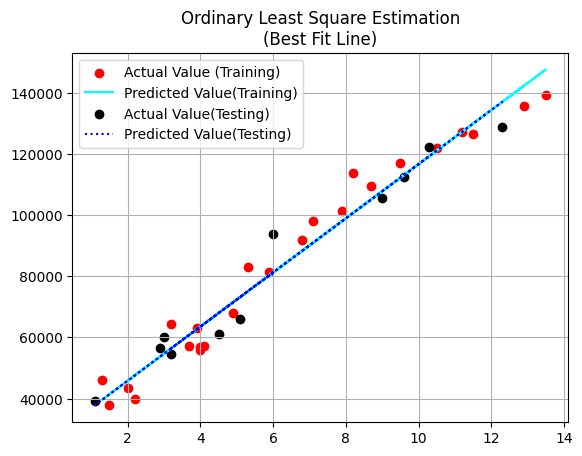

In [8]:
from matplotlib import pyplot as plt
plt.title("Ordinary Least Square Estimation\n(Best Fit Line)")
plt.scatter(x_train,y_train,c='red',label='Actual Value (Training)')
plt.plot(x_train,train_pred,c='cyan',label="Predicted Value(Training)")
plt.scatter(x_test,y_test,c='black',label='Actual Value(Testing)')
plt.plot(x_test,test_pred,c='blue',label="Predicted Value(Testing)",ls=':')
plt.legend()
plt.grid()
plt.show()

In [9]:
regressor.predict([10,])

array([116706.50922923])